In [34]:
import pandas as pd
import numpy as np
import shap
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# AIM:
Implement and test on alternative settings, compare conclusions to those of the paper.

In [2]:
# a classic housing price dataset
X,y = shap.datasets.boston()
# 100 instances for use as the background distribution
X100 = shap.utils.sample(X, 100) 

# a simple linear model
model = LinearRegression()
model.fit(X, y)

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datas

LinearRegression()

In [3]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(4))

Model coefficients:

CRIM = -0.108
ZN = 0.0464
INDUS = 0.0206
CHAS = 2.6867
NOX = -17.7666
RM = 3.8099
AGE = 0.0007
DIS = -1.4756
RAD = 0.306
TAX = -0.0123
PTRATIO = -0.9527
B = 0.0093
LSTAT = -0.5248


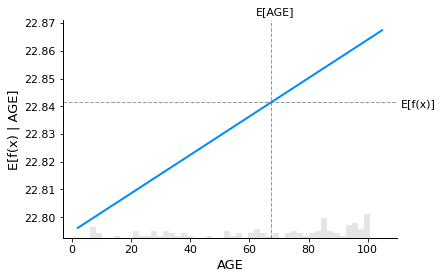

In [4]:
shap.plots.partial_dependence(
    "AGE", model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)
# E[f(x)] - expected value of the fitted model
# E[AGE] - average value of the AGE feature

SHAP value explanation
- Shap values are complicated to compute (NP-hard in general)
- but with linear models we can read teh model right off a partial dependence plot
- The shap value for a specific feature i is just the difference between the expected model output and the partial dependence plot at the feature value's x_i
$$SHAP_i = E[f(x)] - x_i$$<br>

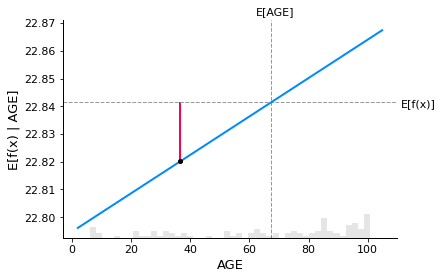

In [5]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 18
shap.partial_dependence_plot(
    "AGE", model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

In [6]:
shap_values[sample_ind:sample_ind+1,:]

.values =
array([[ 0.29059334, -0.57816681, -0.04899326, -0.16120403,  0.2343416 ,
        -3.09292477, -0.02126306,  0.00830301, -1.7046956 ,  1.16117867,
        -2.45904061, -0.70848594,  0.41697301]])

.base_values =
array([22.84139551])

.data =
array([[  0.80271,   0.     ,   8.14   ,   0.     ,   0.538  ,   5.456  ,
         36.6    ,   3.7965 ,   4.     , 307.     ,  21.     , 288.99   ,
         11.69   ]])

In [7]:
X.iloc[sample_ind:sample_ind+1,:]
# AGE SHAP: -0.02126306

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
18,0.80271,0.0,8.14,0.0,0.538,5.456,36.6,3.7965,4.0,307.0,21.0,288.99,11.69


In [8]:
# AGE SHAP: -0.02126306
print('AGE SHAP:', 22.82 - 22.84)

AGE SHAP: -0.019999999999999574


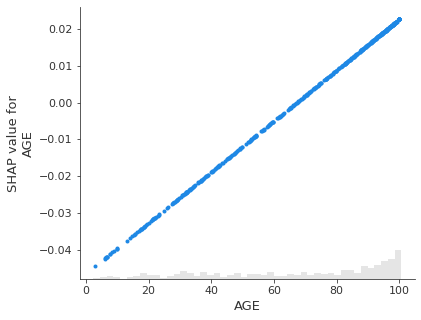

In [9]:
# shows all Age shap values
shap.plots.scatter(shap_values[:,"AGE"])

# SHAP Property: Additive nature
- SHAP values will always sum up to the difference between
    - Baseline (expected model outcome (f(x)))
    - and the Current model outcome

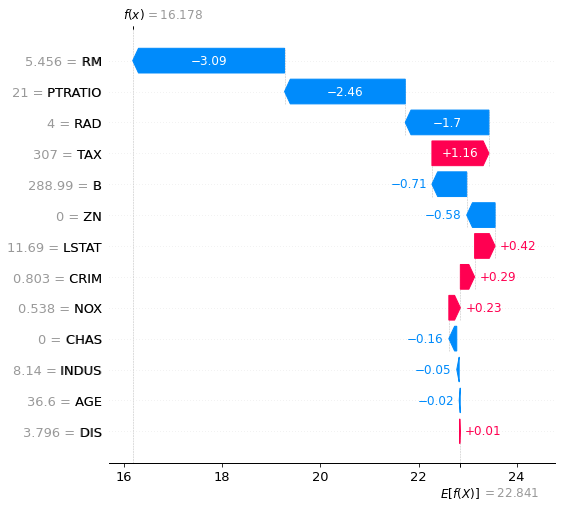

In [10]:
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

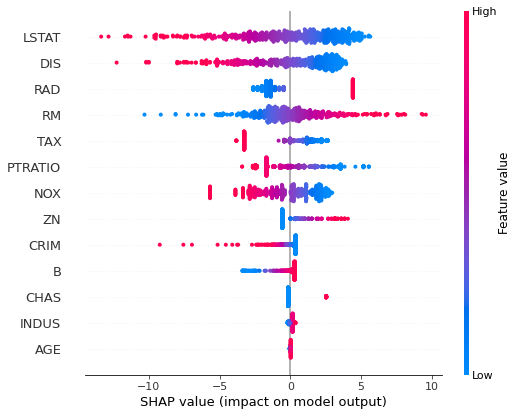

In [12]:
# the waterfall_plot shows how we get from explainer.expected_value to 
# model.predict(X)[sample_ind]
shap.plots.beeswarm(shap_values, max_display=14)

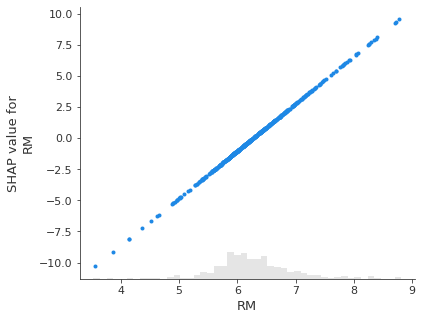

In [18]:
shap.plots.scatter(shap_values[:,"RM"])

# XAI 7 packages 

- dataset: Breast cancer dataset, 
- features: computed from digitized image of a Fine Needle Aspirate(FNA) of a breast mass. Describe characteristics of the cell nuclei present in the image.
- Problem: binary classification

In [19]:
from sklearn.datasets import load_breast_cancer

# Read the DataFrame, first using the feature data
data = load_breast_cancer() 
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add a target column, and fill it with the target data
df['target'] = data.target

# Show the first five rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


- Build XGBOOST model

In [23]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Set up the data for modelling 
y=df['target'].to_frame() # define Y
X=df[df.columns.difference(['target'])] # define X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # create train and test

# build model - Xgboost
xgb_mod=xgb.XGBClassifier(random_state=42,gpu_id=0) # build classifier
xgb_mod=xgb_mod.fit(X_train,y_train.values.ravel()) 

# make prediction and check model accuracy 
y_pred = xgb_mod.predict(X_test)

# Performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[08:37:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 97.37%


## SHAP
- model-agnostic framework
- good [math explanation](https://towardsdatascience.com/shap-explained-the-way-i-wish-someone-explained-it-to-me-ab81cc69ef30)
- more engaging visualisations on [shap](https://medium.com/swlh/push-the-limits-of-explainability-an-ultimate-guide-to-shap-library-a110af566a02)
- push limits of explainability, [guide to shap library](https://medium.com/swlh/push-the-limits-of-explainability-an-ultimate-guide-to-shap-library-a110af566a02)

In [24]:
# Generate the Tree explainer and SHAP values
explainer = shap.TreeExplainer(xgb_mod)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


### Summary dot plot (global)

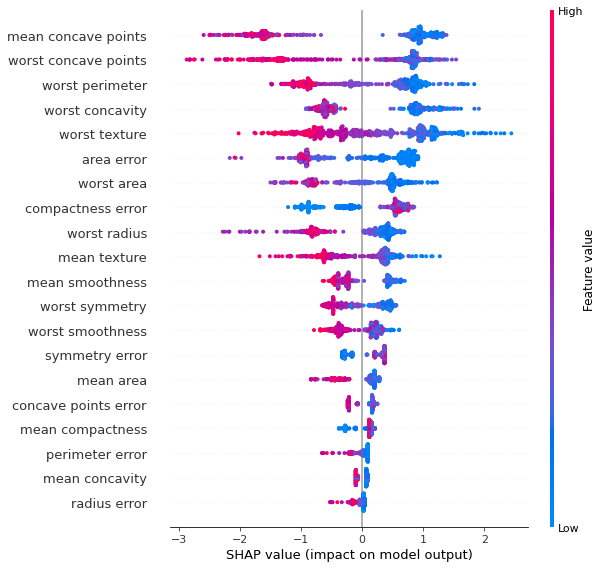

In [25]:
# Generate summary dot plot
shap.summary_plot(shap_values, X,title="SHAP summary plot") 

### Summary bar plot (global)

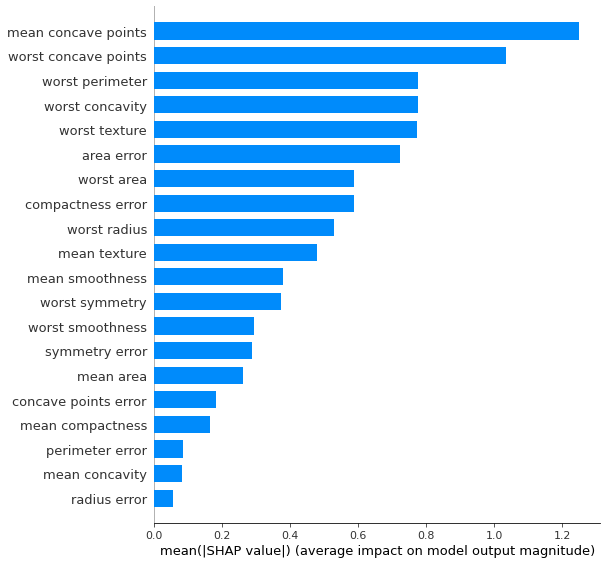

In [26]:
# Generate summary bar plot 
shap.summary_plot(shap_values, X,plot_type="bar") 

### Waterfall plot (local)

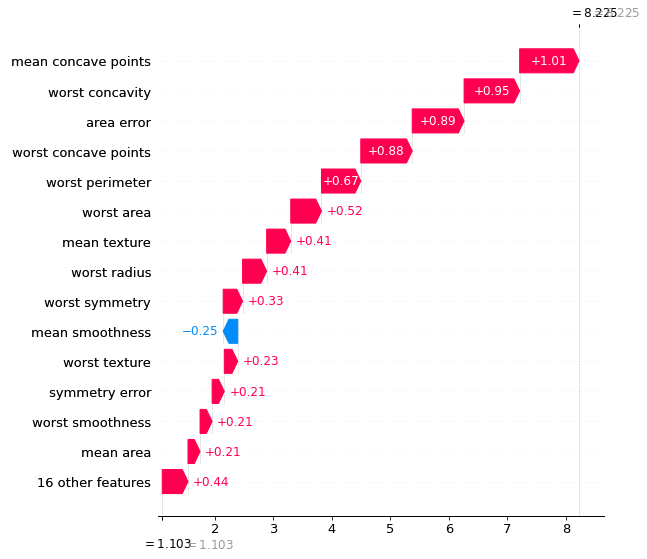

In [27]:
# Generate waterfall plot  
shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[79], 
features=X.loc[79,:], feature_names=X.columns, max_display=15, show=True)


### Dependence plot (Partial Dependence Plot)

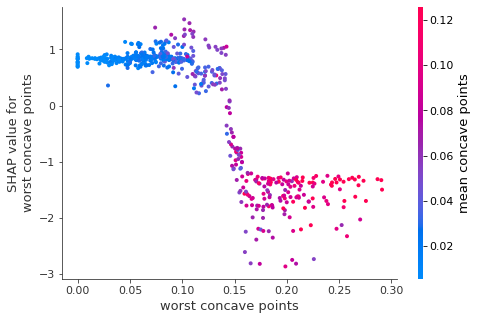

In [28]:
# Generate dependence plot
shap.dependence_plot("worst concave points", shap_values, X, interaction_index="mean concave points")


### Multiple dependence plot

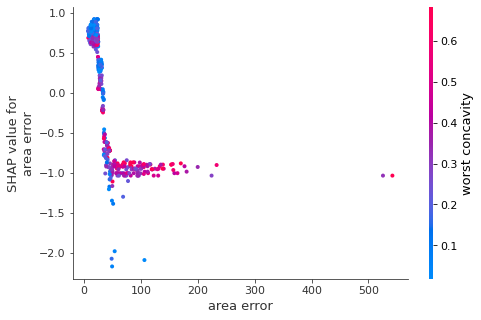

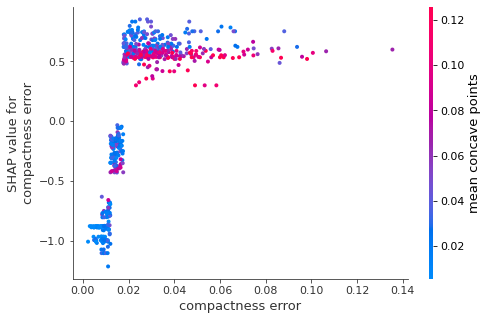

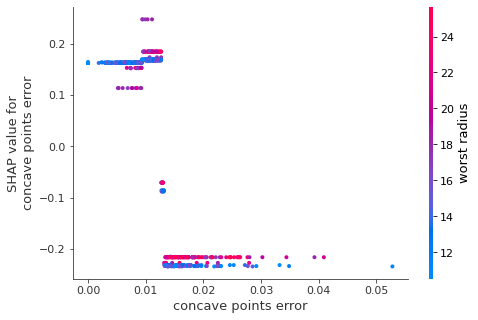

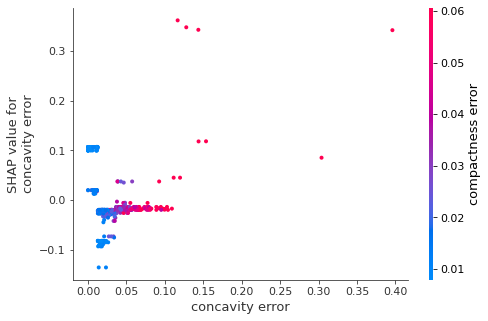

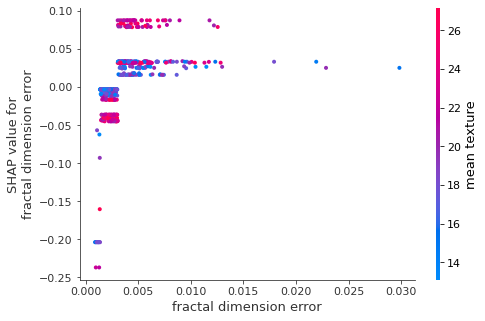

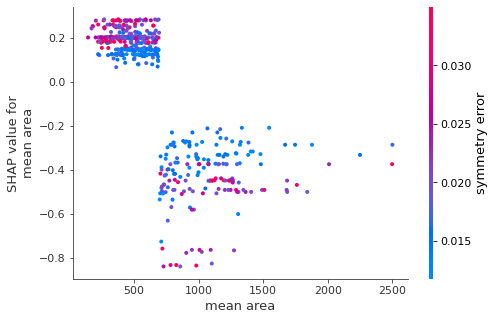

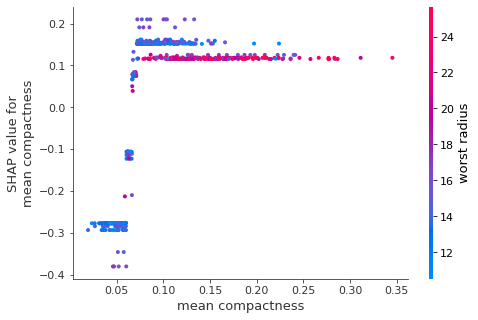

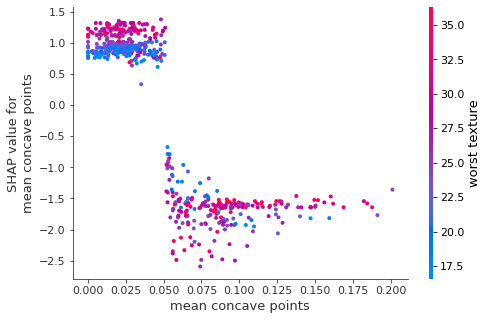

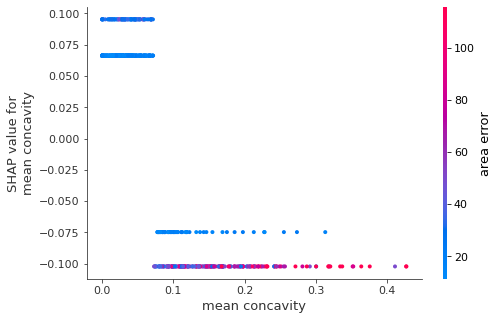

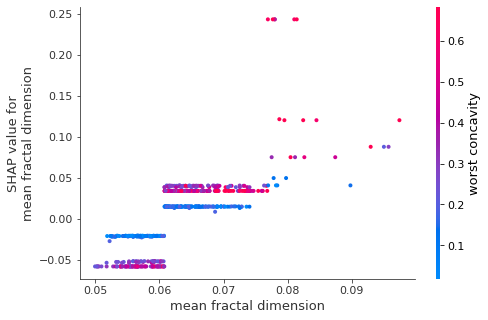

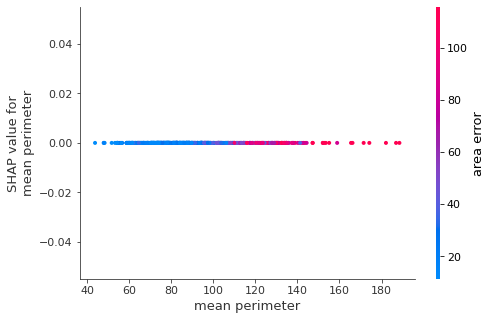

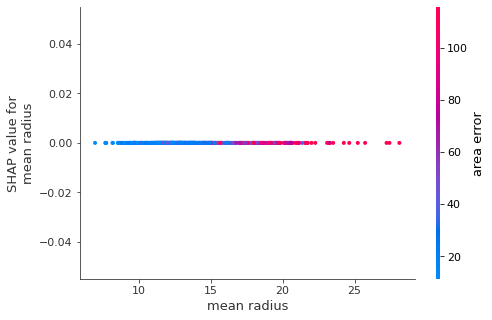

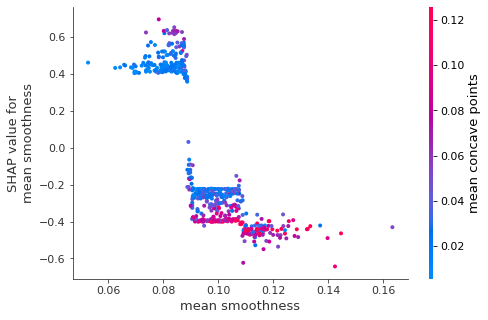

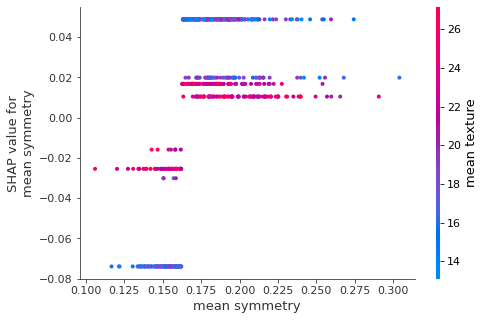

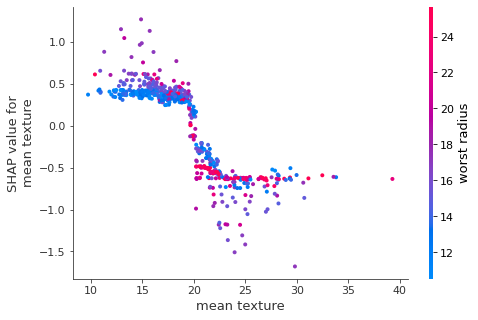

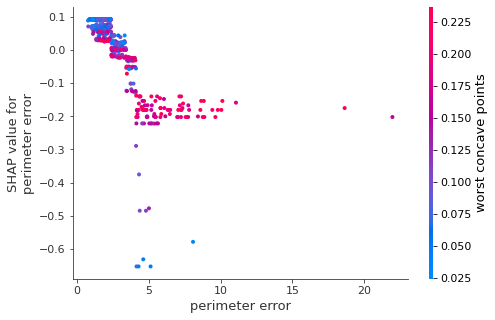

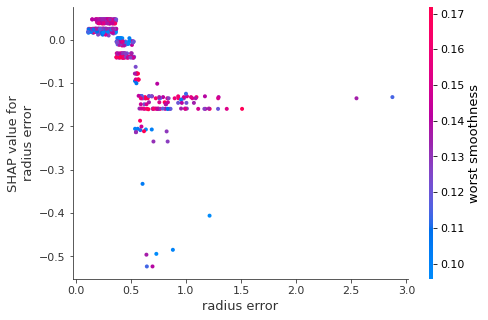

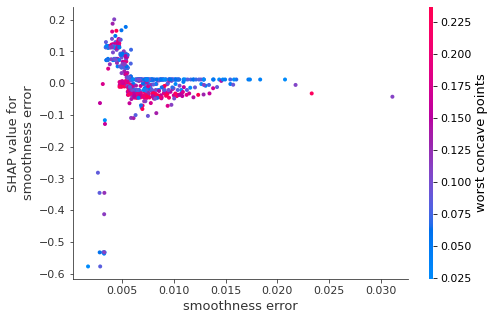

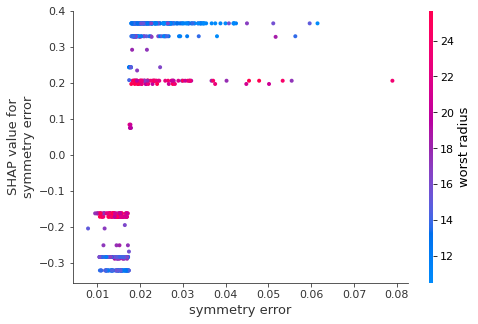

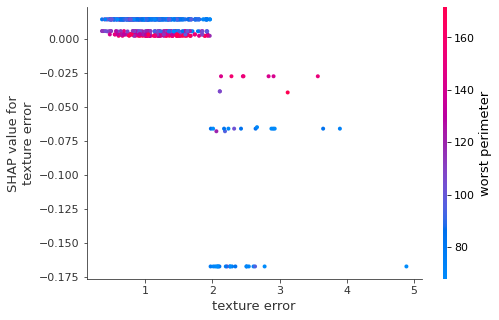

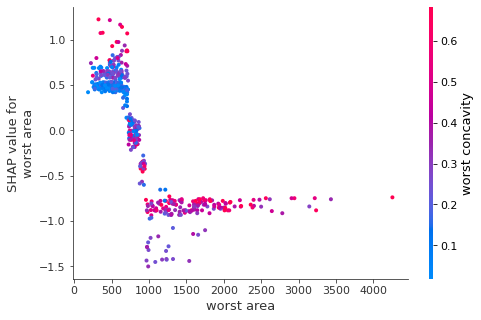

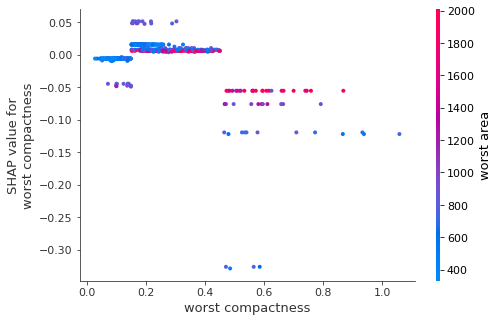

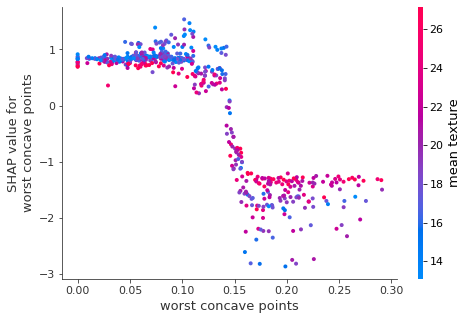

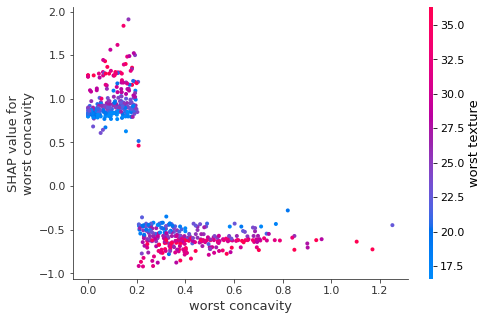

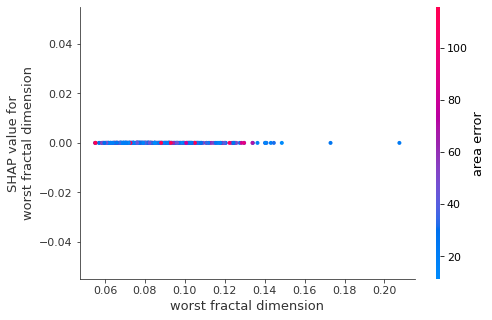

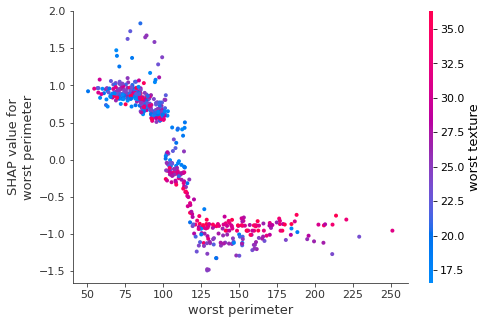

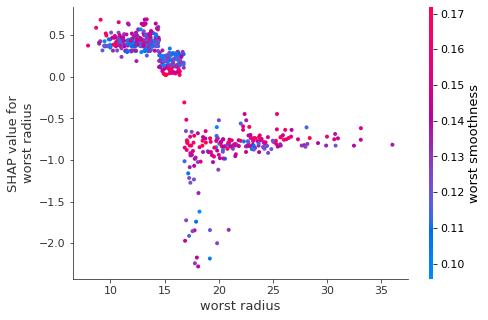

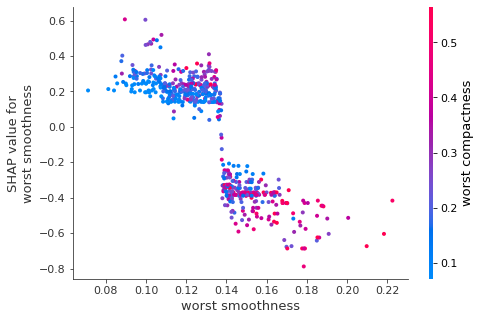

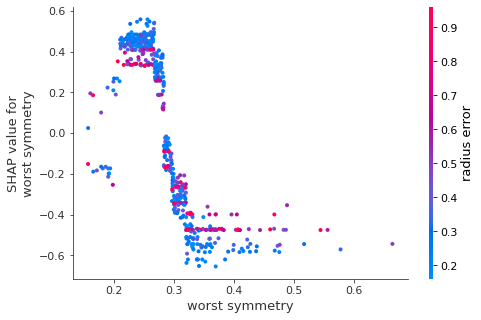

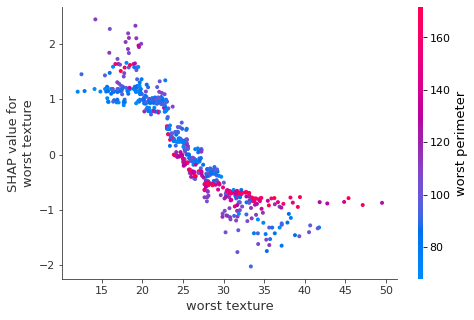

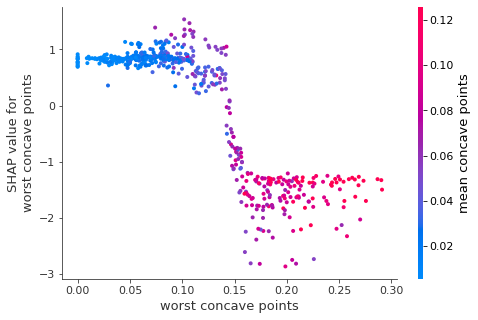

In [29]:
# Generate multiple dependence plots
for name in X_train.columns:
     shap.dependence_plot(name, shap_values, X)
shap.dependence_plot("worst concave points", shap_values, X, interaction_index="mean concave points")


### Force plot - multiple rows

In [1]:
shap.initjs()
#Generate force plot - Multiple rows 
shap.force_plot(explainer.expected_value, shap_values[:100,:], X.iloc[:100,:])


NameError: name 'shap' is not defined

### Force plot - single

In [32]:
# Generate force plot - Single
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

### Decision plot

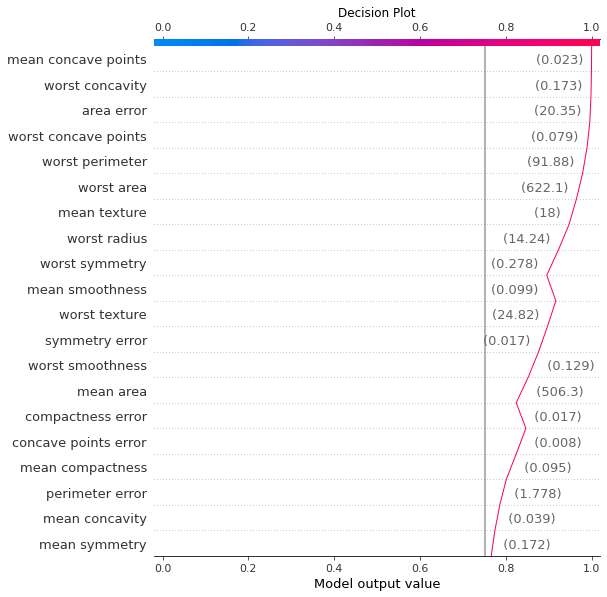

In [33]:
# Generate Decision plot 
shap.decision_plot(expected_value, shap_values[79],link='logit' ,features=X.loc[79,:], feature_names=(X.columns.tolist()),show=True,title="Decision Plot")


## LIME 
- local interpretable model agnostic explanations
- [paper](https://arxiv.org/abs/1602.04938)
- gives local linear approximation of the model's behaviour by creating local surrogate models which are trained to mimic the ML model's predictions locally
- surrogate models: GLMs, decision trees (can be anything)
- steps:
1. Select your instance of interest for which you would like to have an explanation of its black box prediction
2. Perturb your dataset and get black box predictions for these new points
3. Weight the new samples according to their proximity tot eh instance of interest.
4. Train a weighted, interpretable model on the dataset with the variations
5. Explain the prediction by interpreting the local model
**Certain limitations with LIME and should be used with caution**. [details](https://towardsdatascience.com/whats-wrong-with-lime-86b335f34612). And deep-dive further [references](https://towardsdatascience.com/explaining-machine-learning-classifiers-with-lime-def5adaacfea)

In [36]:
# Utilizing our same xgb_mod model object created above
# Import pacakages
import lime
import lime.lime_tabular

In [47]:
############## create explainer ###########
# we use the dataframes splits created above for SHAP
explainer = lime.lime_tabular.LimeTabularExplainer(X_test.to_numpy(), feature_names=X_test.columns, class_names=['0','1'], verbose=True)

############## visualizations #############
# sample = 79
exp = explainer.explain_instance(X.iloc[79], xgb_mod.predict_proba, num_features=20)
exp.show_in_notebook(show_table=True)

Intercept 0.3820659393965828
Prediction_local [1.34041785]
Right: 0.9997322


## Shapash

- interacting and engaging visuals around SHAP/LIME explainability
- python [library](https://shapash.readthedocs.io/en/latest/) built by data scientists
- more [details](https://towardsdatascience.com/shapash-1-3-2-announcing-new-features-for-more-auditable-ai-64a6db71c919) as well as some medium articles and Youtube videos
- publishes an easy to use interactive dashboard as a web app
- Works for:
    - regression
    - binary classification
    - multiclass problems
- Compatibility:
    - catboost
    - xgboost
    - lightGBM
    - sklearn ensemble
    - linear models
    - SVMs

In [49]:
from shapash.explainer.smart_explainer import SmartExplainer

In [52]:
############## launch the app #############
# create explainer
xpl = SmartExplainer()
xpl.compile(
    x=X_test,
    model=xgb_mod
)
#Creating Application
app = xpl.run_app(title_story='Breast Cancer')

############## visualizations #############
# feature importance based on SHAP
xpl.plot.features_importance()

# contributions plot
xpl.plot.contribution_plot("worst concave points")

# Local explanation
xpl.plot.local_plot(index=79)

# compare plot 
xpl.plot.compare_plot(index=[X_test.index[79], X_test.index[80]])

# Interactive interactions widget 
xpl.plot.top_interactions_plot(nb_top_interactions=5)

# save contributions
predictor = xpl.to_smartpredictor()
predictor.add_input(x=X_train, ypred=y_train)
detailed_contributions = predictor.detail_contributions()

/Users/dgtzm99/opt/anaconda3/lib/python3.9/site-packages/shapash/webapp/smart_app.py:307: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.

INFO:root:Your Shapash application run on http://Davids-MacBook-Pro.local:8050/


Backend: Shap TreeExplainer
Dash is running on http://0.0.0.0:8050/



INFO:root:Use the method .kill() to down your app.


Dash is running on http://0.0.0.0:8050/



INFO:shapash.webapp.smart_app:Dash is running on http://0.0.0.0:8050/



 * Serving Flask app "shapash.webapp.smart_app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


Exception in thread Thread-10:
Traceback (most recent call last):
  File "/Users/dgtzm99/opt/anaconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/Users/dgtzm99/opt/anaconda3/lib/python3.9/site-packages/shapash/utils/threading.py", line 29, in __run
    self.__run_backup()
  File "/Users/dgtzm99/opt/anaconda3/lib/python3.9/threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/dgtzm99/opt/anaconda3/lib/python3.9/site-packages/shapash/explainer/smart_explainer.py", line 1165, in <lambda>
    target=lambda: self.smartapp.app.run_server(debug=False, host=host, port=port))
  File "/Users/dgtzm99/opt/anaconda3/lib/python3.9/site-packages/dash/dash.py", line 1716, in run_server
    self.server.run(host=host, port=port, debug=debug, **flask_run_options)
  File "/Users/dgtzm99/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 990, in run
    run_simple(host, port, self, **options)
  File "/Users/dgtzm99/op

INFO:werkzeug:127.0.0.1 - - [20/Mar/2022 09:37:15] "GET /_dash-component-suites/dash_renderer/polyfill@7.v1_8_3m1647768838.8.7.min.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Mar/2022 09:37:15] "GET /_dash-component-suites/dash_renderer/react-dom@16.v1_8_3m1647768838.14.0.min.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Mar/2022 09:37:15] "GET /_dash-component-suites/dash_table/bundle.v4_11_0m1647768838.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Mar/2022 09:37:15] "GET /_dash-component-suites/dash_html_components/dash_html_components.v1_1_1m1647768838.min.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Mar/2022 09:37:15] "GET /_dash-component-suites/dash_bootstrap_components/_components/dash_bootstrap_components.v0_9_1m1647768845.min.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Mar/2022 09:37:15] "GET /_dash-component-suites/dash_core_components/dash_core_components-shared.v1_13_0m1647768838.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Mar/2022 09:37

## ExplainerDashboard
- Interacting dashboard library to explain ML models
- more detailed than Shapash(i.e. not limited to SHAP or LIME)
- Covers aspects such as:
    - Feature importance
    - Metrics and evaluation
    - Local prediction explainability
    - What if analysis
    - Decision Trees
    - Feature dependencies
    - Interactions
- [details](https://medium.com/value-stream-design/making-ml-transparent-and-explainable-with-explainerdashboard-49953ae743dd) on the package
- [guide on this package](https://medium.com/analytics-vidhya/explainer-dashboard-build-interactive-dashboards-for-machine-learning-models-fda63e0eab9)

In [64]:
import explainerdashboard as expd #quite incompatible with shapash
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from explainerdashboard import InlineExplainer
from explainerdashboard.custom import (ImportancesComposite,
                                       IndividualPredictionsComposite,
                                       WhatIfComposite,
                                       ShapDependenceComposite,
                                       ShapInteractionsComposite,
                                       DecisionTreesComposite)


db = ExplainerDashboard(explainer, 
                        title="Breast cancer Explainer", # defaults to "Model Explainer"
                        shap_interaction=False, # you can switch off tabs with bools
                        )
db.run(port=8050)

ImportError: cannot import name 'Input' from 'dash' (/Users/dgtzm99/opt/anaconda3/lib/python3.9/site-packages/dash/__init__.py)

## Dalex
- provides wrappers around various ML frameworks
- [e-book](https://ema.drwhy.ai/) explaining the philosophy and methodology of Dalex, covers various aspects of model explainability
- [further explanation paper](https://www.researchgate.net/publication/324246426_Explanations_of_Model_Predictions_with_live_and_breakDown_Packages)
- [example notebook](https://dalex.drwhy.ai/python-dalex-fairness.html)

## Explainable Boosting Machines (EBM)
- from InterpretML, Microsoft
- [videos](https://youtu.be/MREiHgHgl0k) from authors
- [paper](https://arxiv.org/pdf/1909.09223.pdf)
- package still in early stages
- can be packaged into a dashboard as well

## ELI5
- Explainability package by MIT
- 

# TimeSeries test case

- [dataset](https://www.kaggle.com/rakannimer/air-passengers)

In [65]:
import seaborn as sns


In [67]:
df = pd.read_csv('AirPassengers.csv')

In [72]:
# change object type to date type
df['Month'] = pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [73]:
# set date as index
df.set_index('Month', inplace=True)

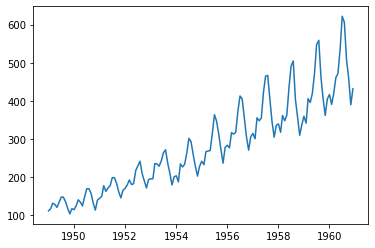

In [74]:
plt.plot(df['#Passengers'])